<a href="https://colab.research.google.com/github/ehardi19/Final-Task-Machine-Learning/blob/master/Tugas_1301174099_1301174223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Pembelajaran Mesin (CSH3L3)**
Kelas IFIK-40-01 Semester Ganjil Tahun Ajaran 2019/2020



**Anggota** 


1.   Eko Hardiyanto (1301174099)
2.   Ganesha Danu Enastika (1301174223)



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### **Data Preprocessing**

In [2]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv


--2019-12-09 00:53:16--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.05s   

2019-12-09 00:53:16 (7.04 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



Baca dataset dan lihat 5 data index teratas.

In [3]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,2759800110,20141031T000000,485000.0,3,2.50,1840,8250,1.0,0,1,3,8,1340,500,1958,0,98177,47.7767,-122.378,1970.0,7920.0
3161,579000096,20141010T000000,780000.0,3,1.50,1620,7500,1.0,0,2,4,8,1620,0,1949,0,98117,47.7014,-122.381,2440.0,7800.0
3162,9169600096,20140801T000000,720000.0,2,1.50,1840,9000,1.0,0,2,3,8,1340,500,1957,0,98136,47.5281,-122.388,1880.0,7560.0
3163,1226059112,20150220T000000,415000.0,3,1.00,1360,73616,1.0,0,0,3,7,1360,0,1971,0,98072,47.7528,-122.119,2040.0,50965.0


Cek dimesi dari dataset.

In [4]:
df.shape

(3165, 21)

Cek informasi tipe data setiap kolom.

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Cek kolom yang memiliki `null` value.

In [6]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15        True
dtype: bool

Berdasarkan informasi diatas didapatkan kolom `sqft_living15` dan `sqft_lot15` memiliki `null` value.

Selanjutnya akan dilakukan drop baris dengan nilai `null` value tersebut.

Dilakukan juga drop kolom yang tidak memiliki korelasi. Dalam konteks ini kolom yang digunakan adalah data yang berupa numeric.

In [7]:
# Drop row dengan nilai null
df = df.dropna()

# Drop juga kolom yang tidak memiliki korelasi 
df = df.drop(['id', 'date', 'zipcode', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,431000.0,3,1.75,1630,9000,1.0,0,0,4,7,1630,0,1600.0,11120.0
3160,485000.0,3,2.50,1840,8250,1.0,0,1,3,8,1340,500,1970.0,7920.0
3161,780000.0,3,1.50,1620,7500,1.0,0,2,4,8,1620,0,2440.0,7800.0
3162,720000.0,2,1.50,1840,9000,1.0,0,2,3,8,1340,500,1880.0,7560.0


# **Supervised Learning**
---



Untuk melakukan prediksi menggunakan supervised learning, kami menggunakan **Artificial Neural Network**, hal ini dikarenakan kita tidak tau keterkaitan antar fitur dengan hasil yaitu price.

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

"""
pembentukan model neural network
"""
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu')) # activa
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model yang dibentuk adalah sebuah neural network dengan 1 layer input, 2 hidden layer dengan masing-masing 50 neuron, adapun fungsi aktifasi yang digunakan adalah rel-U, hal ini dikarenakan rel-U merupakan sebuah fungsi aktifasi dengan performa yang cepat serta, rel-U terkenal memiliki konvergensi lebih cepat. dan neural network ini akan menghasilkan 1 output network berupa price yang dicari.

untuk loss functionnya disini kita menggunakan `mean squared error`, di karenakan fungsi tersebut akan membandingkan jarak antara hasil prediksi dengan yang seharusnya. untuk optimizer learning rate disini digunakan adam karena adam mampu menghasilkan loss tercepat

Train on 791 samples, validate on 2373 samples
Epoch 1/50
791/791 [==============================] - 0s 562us/step - loss: 388472746952.3337 - val_loss: 413856308526.4964
Epoch 2/50
791/791 [==============================] - 0s 232us/step - loss: 343746292781.3097 - val_loss: 368974376202.2487
Epoch 3/50
791/791 [==============================] - 0s 231us/step - loss: 292100674525.0468 - val_loss: 358761657460.9423
Epoch 4/50
791/791 [==============================] - 0s 251us/step - loss: 272974985068.4197 - val_loss: 344612352277.8997
Epoch 5/50
791/791 [==============================] - 0s 261us/step - loss: 255053490437.5019 - val_loss: 324464886685.1816
Epoch 6/50
791/791 [==============================] - 0s 244us/step - loss: 235891786142.2604 - val_loss: 297138306174.4357
Epoch 7/50
791/791 [==============================] - 0s 246us/step - loss: 214066820340.6726 - val_loss: 269674607470.5773
Epoch 8/50
791/791 [==============================] - 0s 250us/step - loss: 189167463

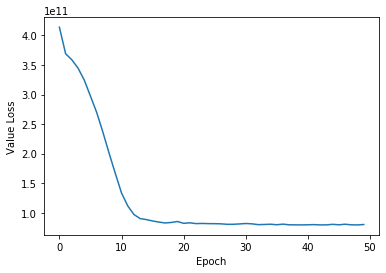

In [0]:
X = df.drop("price", axis=1).values
Y = df[["price"]].values

"""
training dengan 50 epoch dan 75:25 training dan test split
dengan batch 16
"""
history = model.fit(X, Y, validation_split=0.75, epochs=50, batch_size=16, verbose=1)

print(history.history)
plt.plot(history.history['val_loss'])
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.show()

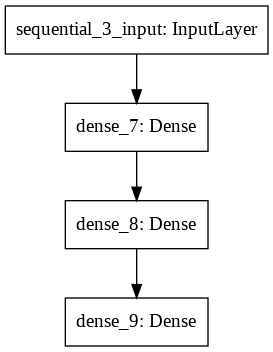

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

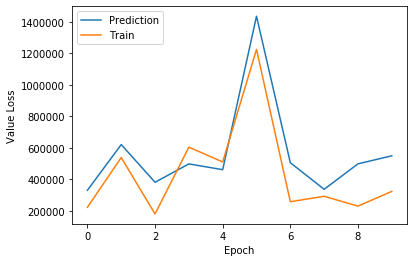

In [0]:
prediction = model.predict(X)

plt.plot(prediction)
plt.plot(Y)
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.legend(['Prediction', 'Train'], loc='upper left')
plt.show()

perbandingan hasil prediksi dengan data training terlihat perbandingan
 yang cukup dekat

# **Unsupervised Learning**
---
### Metode

---



Pada unsupervised learning dengan task clustering dipilih model **K-Means**. Model ini dipilih dengan pertimbangan data yang diberikan memiliki banyak atribut dan tidak memiliki label.


### Data Visualization

---



Pertama akan dilakukan visualisasi dari dataset yang diberikan. Data divisualisasikan dalam bentuk **Scatter Plot** dikarenakan untuk mengetahui persebaran datanya.

Pada visualisasinya kontrol yang digunakan adalah `price` yang akan dibandingkan dengan kolom selainnya.

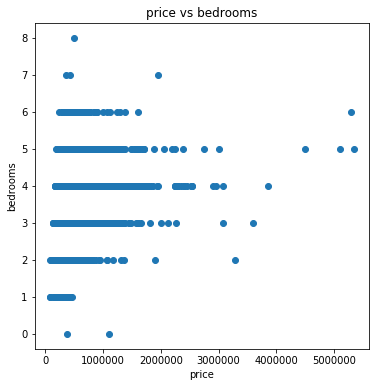

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedrooms');

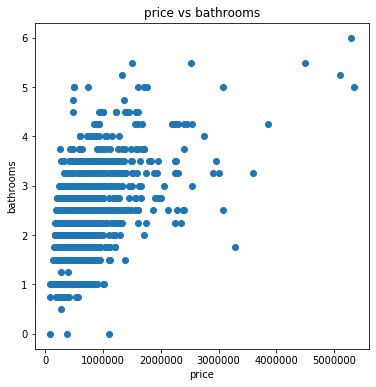

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('price vs bathrooms');

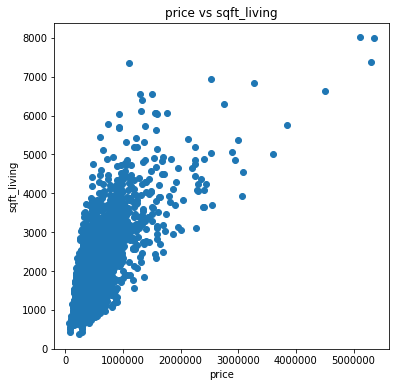

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_living'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('price vs sqft_living');

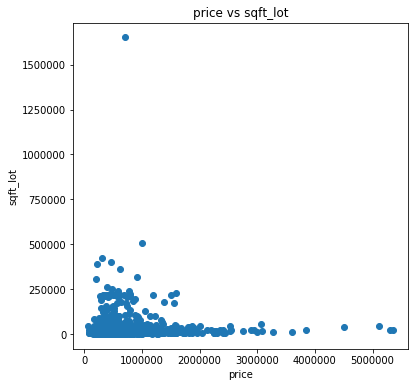

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_lot'])
plt.xlabel('price')
plt.ylabel('sqft_lot')
plt.title('price vs sqft_lot');

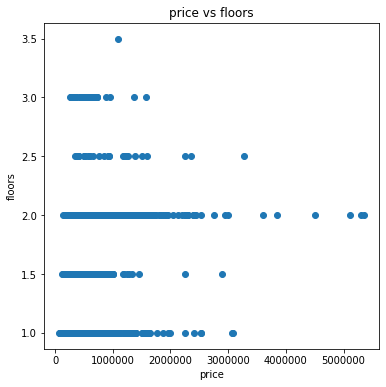

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['floors'])
plt.xlabel('price')
plt.ylabel('floors')
plt.title('price vs floors');

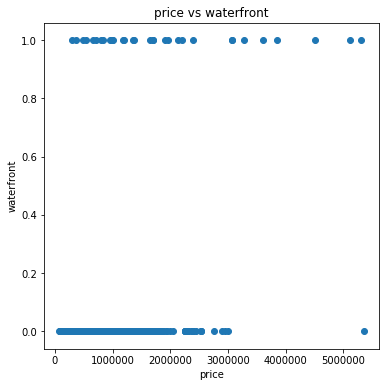

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['waterfront'])
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('price vs waterfront');

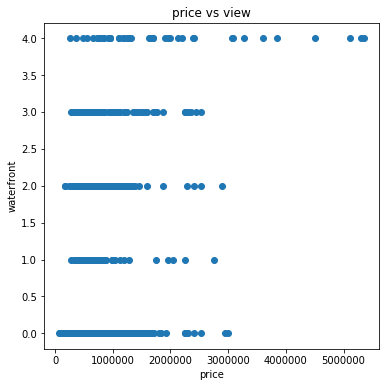

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['view'])
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('price vs view');

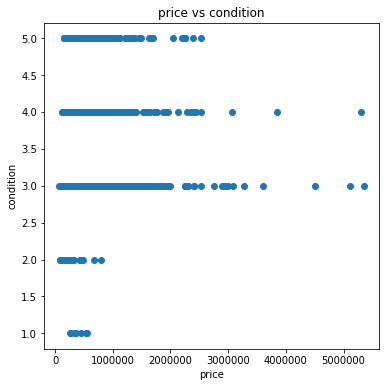

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['condition'])
plt.xlabel('price')
plt.ylabel('condition')
plt.title('price vs condition');

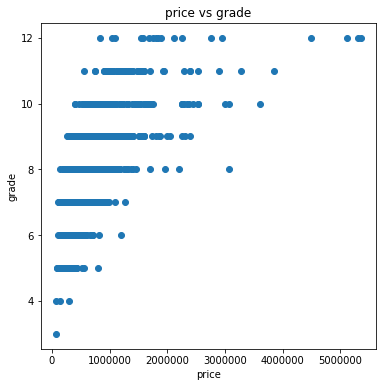

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['grade'])
plt.xlabel('price')
plt.ylabel('grade')
plt.title('price vs grade');

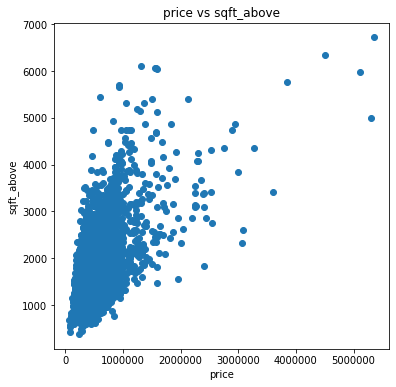

In [0]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_above'])
plt.xlabel('price')
plt.ylabel('sqft_above')
plt.title('price vs sqft_above');

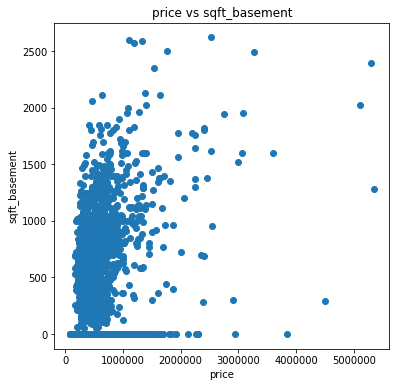

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_basement'])
plt.xlabel('price')
plt.ylabel('sqft_basement')
plt.title('price vs sqft_basement');

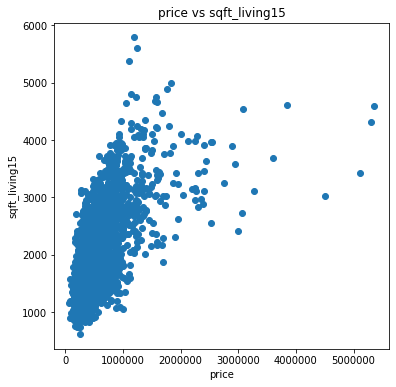

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_living15'])
plt.xlabel('price')
plt.ylabel('sqft_living15')
plt.title('price vs sqft_living15');

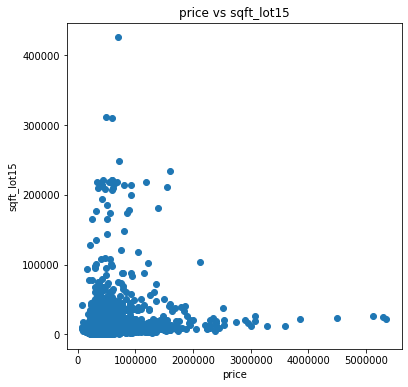

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(df['price'], df['sqft_lot15'])
plt.xlabel('price')
plt.ylabel('sqft_lot15')
plt.title('price vs sqft_lot15');

### K-Means

---
Dibuat model Kmeans sebagai class dengan metode sebagai berikut:


#### `__init__` 
Inisialisasi class dengan sebanyak k cluster

#### `initializ_centroids`
Membuat k buah random centroid sebagai inisialisasi

#### `compute_centroids`
Menentukan centroid baru berdasarkan rata-rata jumlah data di cluster yang bersesuaian

#### `compute_distance`
Menghitung jarak dari data ke setiap centroid. Menggunakan euclidean distance.
![Euclidean Distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)

#### `find_closest_cluster`
Menentukan cluster yang tepat berdasarkan perhitungan jarak dari data ke setiap centroid

#### `compute_sse`
Menghitung Error Sum of Squares (SSE)[*](https://hlab.stanford.edu/brian/error_sum_of_squares.html) yaitu menghitung jumlah dari perbedaan kuadrat antara setiap observasi dan rata-rata cluster digunakan untuk menentukan k terbaik pada elbow method.
![SSE](https://hlab.stanford.edu/brian/error_1.gif)

#### `fit`
Algoritma dari K-Means


1.   Pilih K poin sebagai insial centroid
2.   Loop sampai maksmimum iterasi:
3.   Simpan centoid sekarang
4.   Hitung jarak data ke centroid
5.   Masukkan data ke cluster yang bersesuaian
6.   Hitung centroid baru
7.   Jika centoid baru == centroid lama, break
8. Hitung SSE (Tambahan)









In [0]:
from numpy.linalg import norm

class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123):
      """
      Inisialisasi model dengan n_clusters, max_iter, random_state
      
      Parameter
      n_clusters = jumlah k cluster
      max_iter = maksimum iterasi dari model
      random_state = random state  
      """
      self.n_clusters = n_clusters
      self.max_iter = max_iter
      self.random_state = random_state

    def initializ_centroids(self, X):
      """
      Inisialisasi centroids dengan sebanyak random k titik

      Parameter
      X = data
      """
      np.random.RandomState(self.random_state)
      random_idx = np.random.permutation(X.shape[0])
      centroids = X[random_idx[:self.n_clusters]]
      return centroids

    def compute_centroids(self, X, labels):
      """
      Hitung centroid baru berdasarkan data di cluster

      Parameter
      X = data
      """
      centroids = np.zeros((self.n_clusters, X.shape[1]))
      for k in range(self.n_clusters):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
      return centroids

    def compute_distance(self, X, centroids):
      """
      Menghitung jarak dari data ke centroid

      Parameter
      X = data
      labels = data-data terdekat dengan centroid
      centroids = centroid sebanyak k cluster
      """
      distance = np.zeros((X.shape[0], self.n_clusters))
      for k in range(self.n_clusters):
          row_norm = norm(X - centroids[k, :], axis=1)
          distance[:, k] = np.square(row_norm)
      return distance

    def find_closest_cluster(self, distance):
      """
      Mencari cluster terdekat dari data

      Parameter
      distance = Jarak data ke centroids
      """
      return np.argmin(distance, axis=1)
        
    def compute_sse(self, X, labels, centroids):
      """
      SSE = Sum Squared of Error
      Menghitung jumlah dari perbedaan kuadrat antara setiap observasi dan rata-rata group.

      Parameter
      X = data
      centroids = centroid sebanyak k cluster
      """
      distance = np.zeros(X.shape[0])
      for k in range(self.n_clusters):
        distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
      return np.sum(np.square(distance))

    def fit(self, X):
      """
      Proses clustering kmeans

      Parameter
      X = data
      """
      self.centroids = self.initializ_centroids(X)
      #print('Initialize centroids: \n', self.centroids, '\n')
      for i in range(self.max_iter):
        old_centroids = self.centroids
        distance = self.compute_distance(X, old_centroids)
        self.labels = self.find_closest_cluster(distance)
        self.centroids = self.compute_centroids(X, self.labels)
        #print('Iteration',i,'Centroids: \n', self.centroids, '\n')
        if np.all(old_centroids == self.centroids):
            break
        self.error = self.compute_sse(X, self.labels, self.centroids)

### Standarisasi Data

---



Pertama lakukan standarisasi data untuk perhitungan ke model K-means.

In [0]:
X_std = StandardScaler().fit_transform(df)

### Menentukan Optimal K

---
Untuk menentukan optimal K dipilih **elbow method**.

Hitung SSE dari setiap k yang berbeda lalu berdasarkan pengamatan pilih k yang berada pada titik elbow-nya.



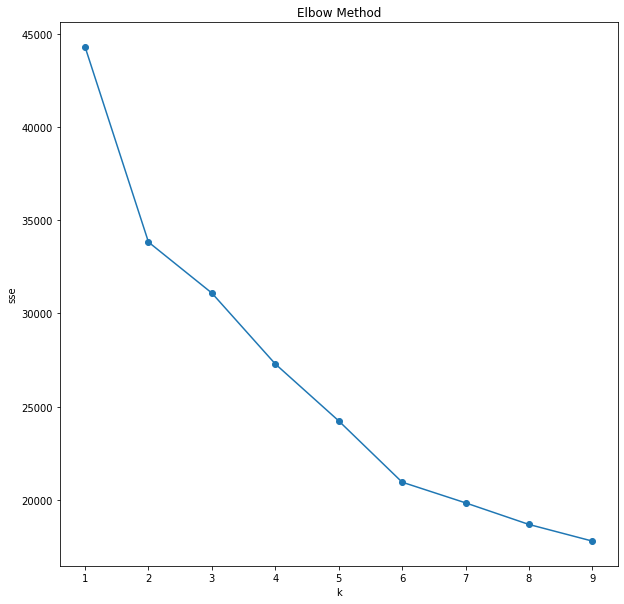

In [32]:
# Jalankan kmeans dengan k dari 1..10
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = Kmeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.error)

# Plot sse vs k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('sse');

Didapatkan titik **elbow** atau titik dari grafik yang pertama kali turun adalah pada **k = 2**, maka dipilih k = 2 untuk clustering menggunakan k-means.

In [0]:
# Inisiasi Model Kmeans dengan k = 2 dan maximum iterasi adalah 100
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

Didapatkan centroid akhir untuk kedua cluster masing-masing adalah sebagai berikut

In [34]:
centroids

array([[ 0.77135693,  0.65914453,  0.88798648,  1.05664556,  0.19691741,
         0.71756509,  0.15158039,  0.39377625, -0.13519066,  1.02509354,
         1.06624463,  0.22309112,  1.02944317,  0.25840931],
       [-0.36221173, -0.30951933, -0.41697832, -0.49617681, -0.09246795,
        -0.3369523 , -0.07117872, -0.1849084 ,  0.06348247, -0.48136069,
        -0.50068431, -0.10475853, -0.48340318, -0.12134315]])

Lakukan visualisasi clustering dari K-Means dengan K = 2

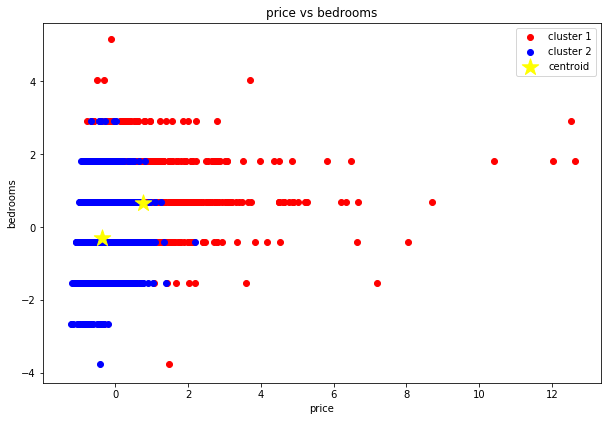

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedrooms')
ax.set_aspect('equal');

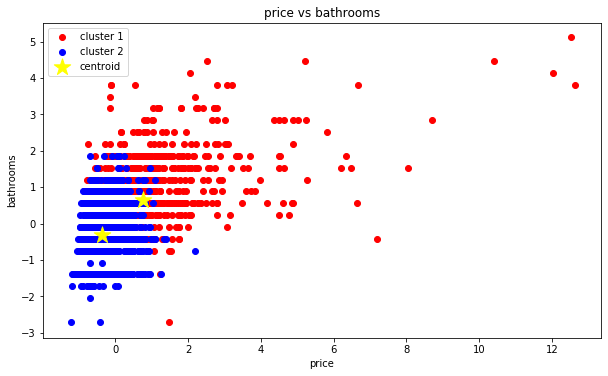

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 2],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 2],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('price vs bathrooms')
ax.set_aspect('equal');

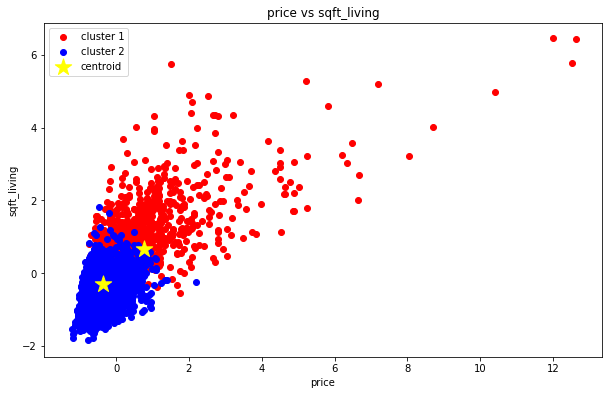

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 3],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 3],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('price vs sqft_living')
ax.set_aspect('equal');

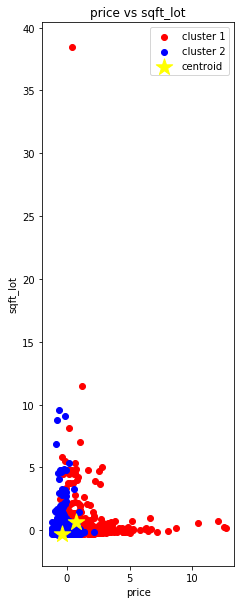

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 4],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 4],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_lot')
plt.title('price vs sqft_lot')
ax.set_aspect('equal');

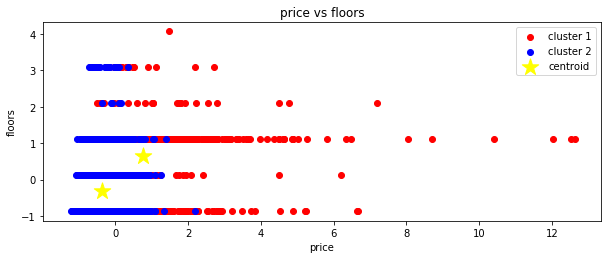

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 5],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 5],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('floors')
plt.title('price vs floors')
ax.set_aspect('equal');

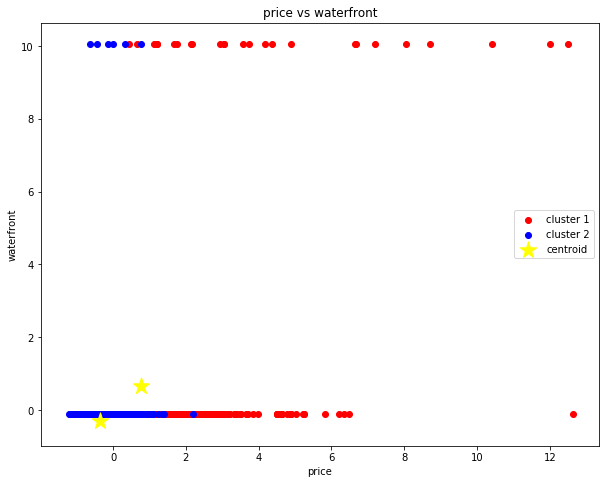

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 6],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 6],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('price vs waterfront')
ax.set_aspect('equal');

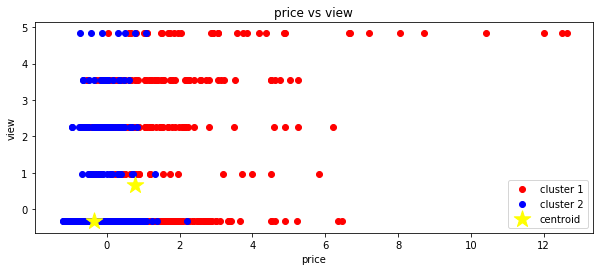

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 7],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 7],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('view')
plt.title('price vs view')
ax.set_aspect('equal');

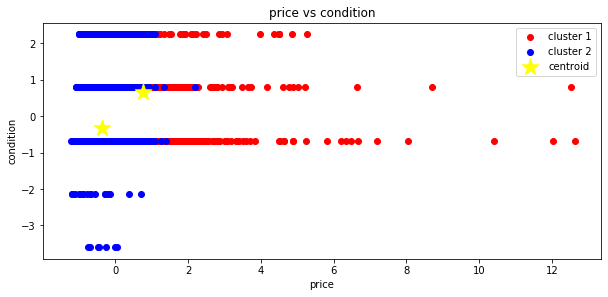

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 8],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 8],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('condition')
plt.title('price vs condition')
ax.set_aspect('equal');

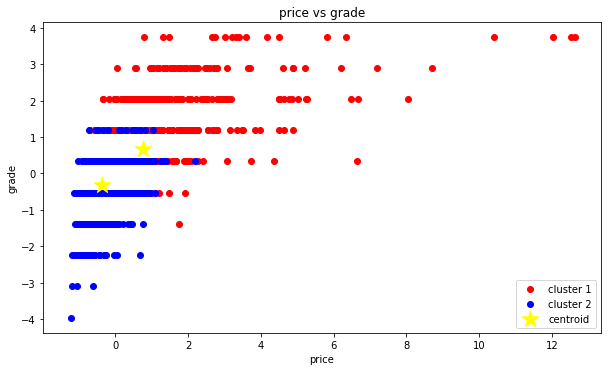

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 9],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 9],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('grade')
plt.title('price vs grade')
ax.set_aspect('equal');

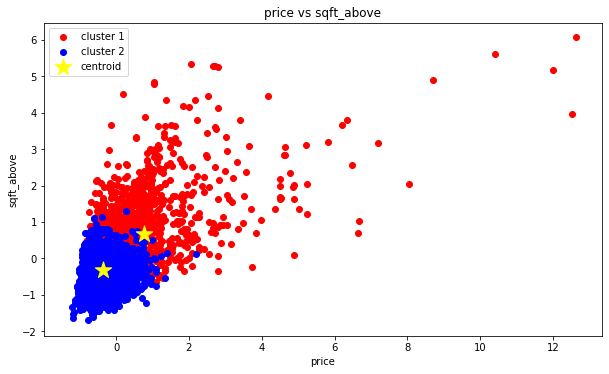

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 10],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 10],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_above')
plt.title('price vs sqft_above')
ax.set_aspect('equal');

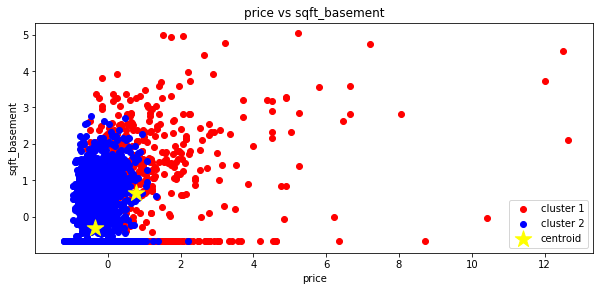

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 11],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 11],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_basement')
plt.title('price vs sqft_basement')
ax.set_aspect('equal');

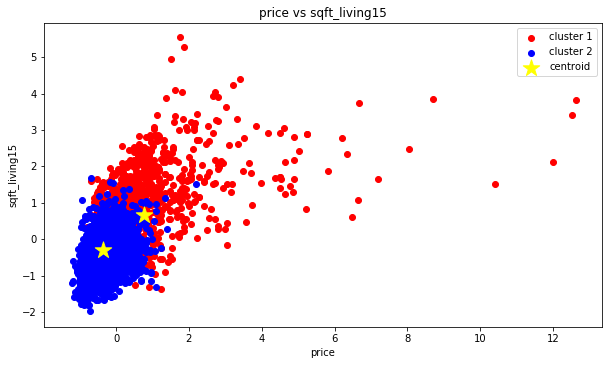

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 12],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 12],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_living15')
plt.title('price vs sqft_living15')
ax.set_aspect('equal');

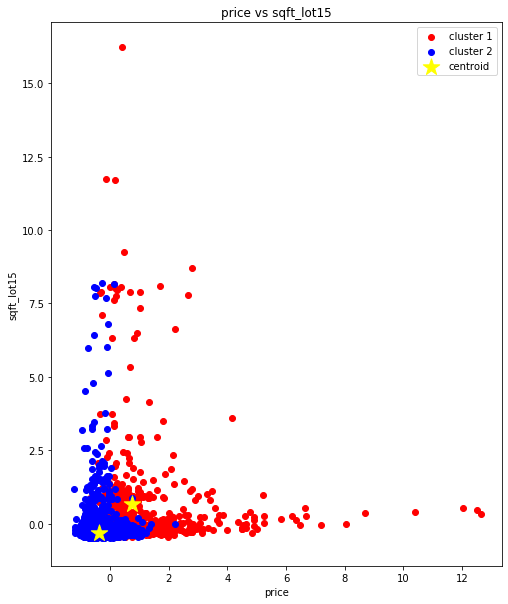

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 13],
            c='red', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 13],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='yellow', label='centroid')
plt.legend()
plt.xlabel('price')
plt.ylabel('sqft_lot15')
plt.title('price vs sqft_lot15')
ax.set_aspect('equal');